# Imports and Functions

All functions and imports are saved in the file `time_series.py`.

In [1]:
from time_series import *
%matplotlib inline

## Load data and isolate region

Load the data stored in `'zillow_data.csv'`. This dataset from Zillow contains housing values by month from 1996 to 2018 for over 14,000 zipcodes across the US. Use function `get_df()` to easily extract the desired information. Optional location parameters include zipcode, city, state_initials, metro, and county, as well as start and end times. 

In [2]:
#Load zillow data
raw_df = pd.read_csv('zillow_data.csv')
#Get desired subset of zipcodes
df = get_df(raw_df, state_initials='DC')
#Set region_name
region_name = 'DC'
#Check length of subset
print("Number of zipcodes in region: {}".format(len(df)))
raw_df.head()

Number of zipcodes in region: 18


RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank    1996-04    1996-05    1996-06   ...     2017-07  2017-08  \
0         1 334200.000 335400.000 336500.000   ...     1005500  1007500   
1         2 235700.000 236900.000 236700.000   ...      308000   310000   
2         3 210400.000 212200.000 212200.000   ...      321000   320600   
3         4 498100.000 500900.000 503100.000   ...     1289800  1287700   
4         5  77300.000  77300.000  77300.000   ...      119100   119400   

   2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1007800  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   312500   314100   315000   316600   318100   319600   321100   321800  
2   320200   320400   320800   321200   321200   323000   326900   329900  
3  1287400  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120000   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

## Format and clean data

Convert the new subset to time series format using the function `make_time_series()`. This function returns a dataframe with the index as Month and columns for the housing value in each zipcode. Check the dataframe, data types, null values and summary statistics.

In [3]:
#Create dataframe in time series format
ts_all = make_time_series(df)
display(ts_all.head())
#Check data types
display(ts_all.info())
#Check for null placeholders
display(ts_all.describe())
#Check for null values
nulls = df.isna().sum().sum()
print('Count of null values: {}'.format(nulls))
#Take extra steps here to handle null values if necessary

20002      20009      20011     20019     20001      20020  \
Month                                                                       
1996-04-01 94300.000 178800.000 118900.000 91300.000 92000.000 104500.000   
1996-05-01 94000.000 179200.000 118500.000 91000.000 92600.000 103800.000   
1996-06-01 93700.000 179600.000 118200.000 90600.000 93200.000 103000.000   
1996-07-01 93600.000 180000.000 117800.000 90400.000 93900.000 102200.000   
1996-08-01 93400.000 180300.000 117600.000 90100.000 94600.000 101400.000   

                20008      20003     20032      20016      20010      20007  \
Month                                                                         
1996-04-01 450100.000 130000.000 85700.000 362000.000 110500.000 358100.000   
1996-05-01 448200.000 130100.000 85500.000 361200.000 111200.000 356000.000   
1996-06-01 446300.000 130200.000 85400.000 360300.000 112000.000 353900.000   
1996-07-01 444500.000 130400.000 85200.000 359400.000 112900.000 351700.000   
1996-08-01 442900.000 130600.000 85000.000 358500.000 113800.000 349600.000   

                20024      20017      20018      20037      20015      20012  
Month                                                                         
1996-04-01 209800.000 121700.000 123000.000 277800.000 312400.000 185000.000  
1996-05-01 208200.000 121400.000 122400.000 275800.000 311000.000 184900.000  
1996-06-01 206600.000 121200.000 121800.000 273700.000 309800.000 184700.000  
1996-07-01 205000.000 121000.000 121200.000 271600.000 308700.000 184400.000  
1996-08-01 203300.000 120900.000 120700.000 269500.000 307900.000 184100.000

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 18 columns):
20002    265 non-null float64
20009    265 non-null float64
20011    265 non-null float64
20019    265 non-null float64
20001    265 non-null float64
20020    265 non-null float64
20008    265 non-null float64
20003    265 non-null float64
20032    265 non-null float64
20016    265 non-null float64
20010    265 non-null float64
20007    265 non-null float64
20024    265 non-null float64
20017    265 non-null float64
20018    265 non-null float64
20037    265 non-null float64
20015    265 non-null float64
20012    265 non-null float64
dtypes: float64(18)
memory usage: 39.3 KB


None

20002       20009      20011      20019      20001      20020  \
count    265.000     265.000    265.000    265.000    265.000    265.000   
mean  334891.698  610009.057 310201.132 175588.302 384943.774 200793.585   
std   172648.309  255816.618 136781.136  61101.973 203111.477  69213.664   
min    93400.000  178800.000 117400.000  89200.000  92000.000  99200.000   
25%   148400.000  370300.000 169500.000 118300.000 168600.000 129100.000   
50%   370600.000  700300.000 320100.000 178000.000 416900.000 206300.000   
75%   410500.000  753000.000 396800.000 222000.000 472200.000 259000.000   
max   691300.000 1081000.000 619100.000 314100.000 793300.000 337000.000   

            20008      20003      20032       20016      20010       20007  \
count     265.000    265.000    265.000     265.000    265.000     265.000   
mean  1082671.698 478972.075 174957.736  811999.245 401186.415  877087.925   
std    329620.999 211266.445  62684.673  253033.253 195092.605  289807.793   
min    440100.000 130000.000  82500.000  356400.000 110500.000  342900.000   
25%    873100.000 280300.000 118700.000  591900.000 192100.000  642500.000   
50%   1229300.000 556500.000 174800.000  917200.000 437100.000  991900.000   
75%   1316100.000 612300.000 228300.000  953200.000 489200.000 1058600.000   
max   1545900.000 820200.000 308200.000 1215900.000 778200.000 1330800.000   

           20024      20017      20018       20037       20015      20012  
count    265.000    265.000    265.000     265.000     265.000    265.000  
mean  527157.736 293233.208 294817.358  660361.132  730394.717 434212.075  
std   207249.674 122808.279 122242.513  216826.780  216779.606 157999.546  
min   194800.000 120900.000 120200.000  262000.000  307300.000 183700.000  
25%   333900.000 166500.000 159200.000  480400.000  562100.000 292100.000  
50%   588300.000 307200.000 304200.000  758100.000  827600.000 471700.000  
75%   643500.000 373900.000 384100.000  804100.000  871700.000 547000.000  
max   900700.000 548900.000 554100.000 1019600.000 1007200.000 730700.000

Count of null values: 0


**Observations:**

This subset does not require any preprocessing. All data is stored as float and there are no null values. 

## Visualize data

Create visualization of the data using the functions `plot_time_series()` and `decompose_time_series()`.

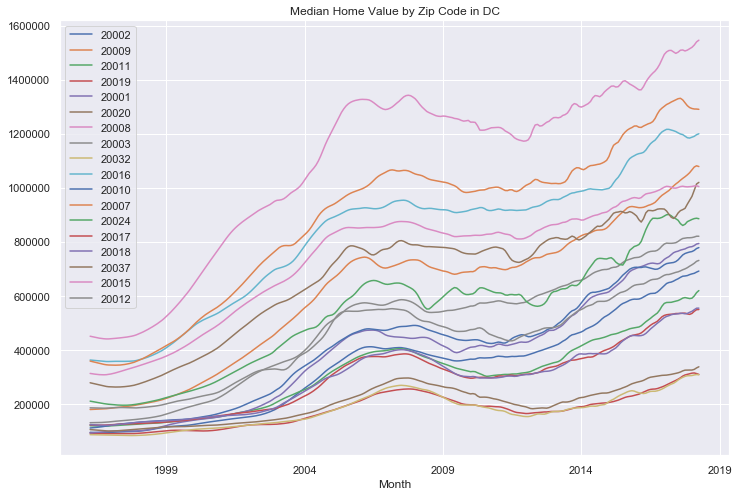

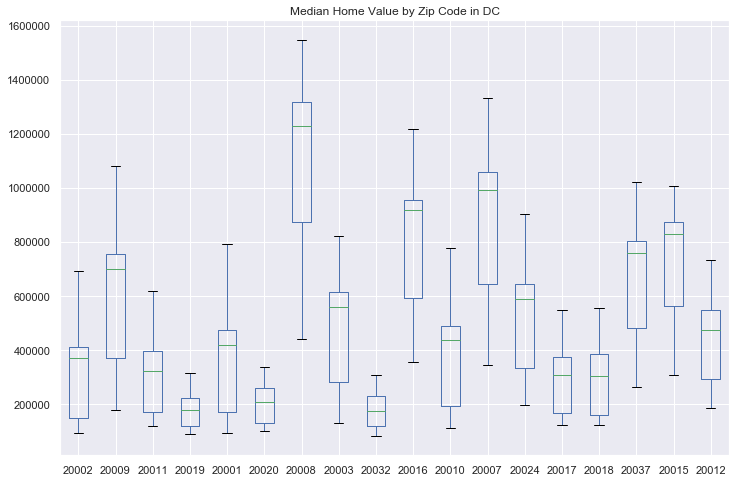

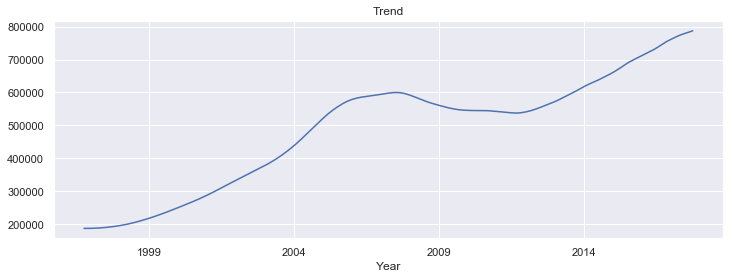

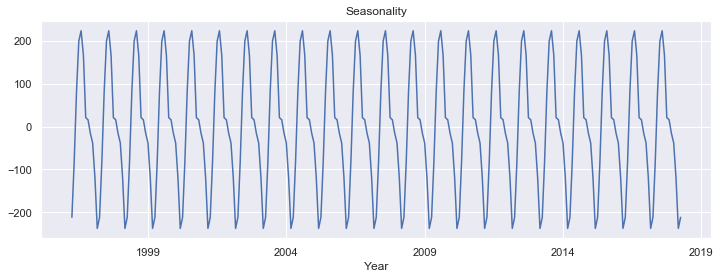

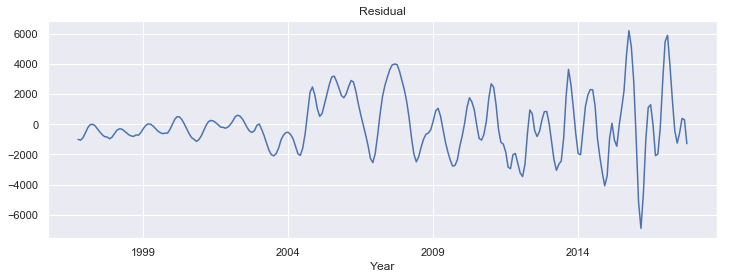

In [4]:
#Plot the time series with line graph and boxplot
plot_time_series(ts_all, region_name=region_name, line=True, boxplot=True)

#Plot decomposition of time series
##To plot mean of region, set ts=ts_all and mean=True
##Otherwise use single time series
decompose_time_series(ts_all, mean=True)

**Observations:**

* There is a clear positive trend and seasonality. 
* The 2008 housing market crash is apparent in the data. The market rebounds around 2012.
* The box plot shows the historical distribution of housing values by zipcode, illustrating which zipcodes have seen the biggest change in value.

## Optimize parameters

Create holdout set using the function `train_test_split()`. Use the functions `pacf_plot()` and `acf_plot()` to check the correlation to time. Create the combinations of parameters to test using the function `param_combinations()`.

In [5]:
#Reserve 12 months for final testing
cross_validation, test = train_test_split(ts_all, 12)

Train Test Split Complete 
Length of Train: 253 	Length of Test: 12


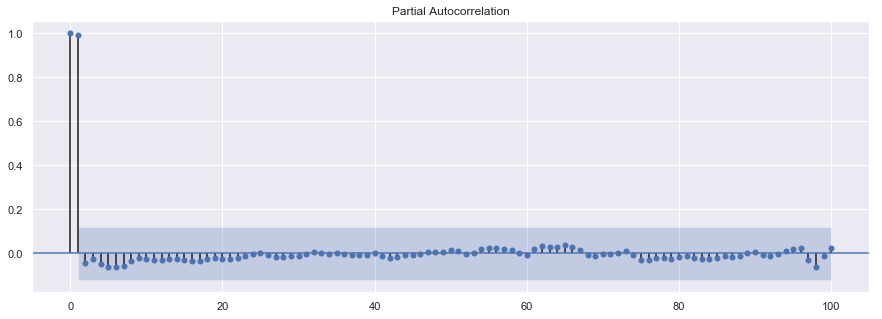

In [6]:
pacf_plot(ts_all[20020])

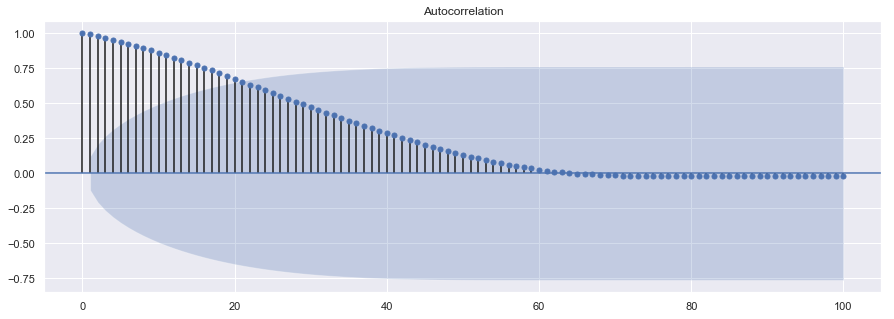

In [7]:
acf_plot(ts_all[20020])

In [8]:
#Create combinations of parameters
param_combos = param_combinations(seasonal=[12], trend=[None])
#Check length of combinations
print('Total parameter combinations: {}'.format(len(param_combos)))

Total parameter combinations: 324


### Experiment with small subset of zipcodes and parameter combinations

Convert the following cells to code to run tests on a small subset of zipcodes and parameters. These functions will take a very long time to run for all parameters and all zipcodes in the region. 

#EXPERIMENT 
#Make random subset of zipcodes and parameters
zipcodes = set(ts_all.columns)
z = random.sample(zipcodes,6)
ps = random.sample(param_combos,5)
z_ts = cross_validation[z]
z_test = test[z]

#EXPERIMENT
#Iterate through all parameter combinations for all zipcodes
test_all_models = run_all_models(z_ts, ps)
#Save dataframe of all model results to csv file for future work
test_all_models.to_csv('test_all_models.csv', index=False)

#EXPERIMENT
#Read dataframe with all model results
test_all_df = pd.read_csv('test_all_models.csv').round(1)
test_all_df

#Sort by desired criterion to find best model for each zipcode
test_best_results = sort_best_models(test_all_df, 'AIC', drop_duplicates=True)
test_best_results

### Optimize over full region with all parameter combinations

Break the region into smaller sections to avoid memory issues while processing. Use the function `run_all_models()` to iterate through all combinations of parameters for all zipcodes in region. This function also performs forward chaining nested cross validation on each model. Save each dataframe to a csv file then combine them all together into one dataframe.

#Break reagion into smaller sections for easier processing
ts1 = ts_all.iloc[:,:6]
ts2 = ts_all.iloc[:,6:12]
ts3 = ts_all.iloc[:,12:18]
print(f'''Verify all columns are accounted for: 
      {len(ts_all.columns) == len(ts1.columns) + len(ts2.columns) + len(ts3.columns)}''')
#Drop problematic zipcode (figure out how to fix later)
ts2.drop(20003, axis=1, inplace=True)

#THIS CELL TAKES A VERY LONG TIME TO RUN
#Iterate through all parameter combinations for subset of zipcodes
ts1_models = run_all_models(ts1, param_combos)
#Save dataframe of ts1 model results to csv file for future work
ts1_models.to_csv('ts1_models.csv', index=False)

#THIS CELL TAKES A VERY LONG TIME TO RUN
#Iterate through all parameter combinations for subset of zipcodes
ts2_models = run_all_models(ts2, param_combos)
#Save dataframe of ts2 model results to csv file for future work
ts2_models.to_csv('ts2_models.csv', index=False)

#THIS CELL TAKES A VERY LONG TIME TO RUN
#Iterate through all parameter combinations for subset of zipcodes
ts3_models = run_all_models(ts3, param_combos)
#Save dataframe of ts3 model results to csv file for future work
ts3_models.to_csv('ts3_models.csv', index=False)

#Read csv files for all model results
cols = list(pd.read_csv("ts1_models.csv", nrows =1))
ts1_models_df = pd.read_csv('ts1_models.csv', usecols =[i for i in cols if i != 'model']).round(1)
ts2_models_df = pd.read_csv('ts2_models.csv', usecols =[i for i in cols if i != 'model']).round(1)
ts3_models_df = pd.read_csv('ts3_models.csv', usecols =[i for i in cols if i != 'model']).round(1)

#Combine all model results
all_models_df = pd.concat([ts1_models_df, ts2_models_df, ts3_models_df], ignore_index=True)
all_models_df.rename(columns={'CV_RMSE':'CVRMSE'}, inplace=True)
display(all_models_df.shape)
print(f'''Verify all data is accounted for: 
    {len(all_models_df) == len(ts1_models_df) + len(ts2_models_df) + len(ts3_models_df)}''')

all_models_df.to_csv('all_models.csv', index=False)

In [9]:
final_models = pd.read_csv('all_models.csv')
display(final_models.shape)
final_models.head()

(5508, 7)

zipcode      order         sorder  trend      AIC      BIC       CVRMSE
0    20002  (0, 0, 0)  (0, 0, 0, 12)    nan 5924.200 5927.600   395446.400
1    20002  (0, 0, 0)  (0, 0, 1, 12)    nan 5473.900 5480.500   379658.000
2    20002  (0, 0, 0)  (0, 0, 2, 12)    nan 8709.100 8718.800 28449668.800
3    20002  (0, 0, 0)  (0, 1, 0, 12)    nan 4739.700 4743.000    99050.900
4    20002  (0, 0, 0)  (0, 1, 1, 12)    nan 4466.900 4473.400    99035.700

## Validate best model for each zipcode

Use the function `sort_best_models()` to sort the dataframe of all models by the desired criteria. The function `add_rmse_to_final_models()` will add the final RMSE for validation with the cross validation RMSE (CVRMSE). Check the summary statistics and plot the diagnostics for the best model for each zipcode. Finally, use the function `plot_predictions()` to compare the model predictions to the holdout set. 

In [10]:
best_results_aic = sort_best_models(final_models, 'AIC', drop_duplicates=True)
add_rmse_to_final_models(best_results_aic, cross_validation, test)
best_results_aic

zipcode      order         sorder trend      AIC      BIC  \
1175    20019  (1, 1, 2)  (0, 1, 2, 12)  None 2496.800 2515.700   
2483    20032  (1, 1, 2)  (2, 1, 2, 12)  None 2585.900 2611.100   
4415    20018  (1, 1, 2)  (0, 1, 2, 12)  None 2661.900 2680.800   
4091    20017  (1, 1, 2)  (0, 1, 2, 12)  None 2677.600 2696.400   
857     20011  (1, 1, 2)  (1, 1, 2, 12)  None 2695.000 2717.000   
203     20002  (1, 1, 2)  (0, 1, 2, 12)  None 2725.300 2744.200   
5069    20015  (1, 1, 2)  (1, 1, 2, 12)  None 2769.900 2791.900   
1835    20020  (1, 1, 2)  (2, 1, 2, 12)  None 2782.300 2807.500   
3131    20010  (1, 1, 2)  (2, 1, 2, 12)  None 2793.000 2818.200   
5387    20012  (1, 1, 2)  (0, 1, 2, 12)  None 2799.800 2818.600   
2909    20016  (2, 1, 2)  (1, 1, 2, 12)  None 2826.300 2851.500   
1511    20001  (1, 1, 2)  (2, 1, 2, 12)  None 2840.800 2866.000   
533     20009  (1, 1, 2)  (1, 1, 2, 12)  None 2859.300 2881.300   
4745    20037  (1, 1, 2)  (1, 1, 2, 12)  None 2924.100 2946.200   
3557    20007  (2, 1, 2)  (1, 1, 2, 12)  None 2950.300 2975.500   
3773    20024  (1, 1, 2)  (1, 1, 2, 12)  None 3030.200 3052.200   
2267    20008  (2, 1, 2)  (2, 1, 2, 12)  None 3294.100 3322.400   

                                                 CVRMSE      RMSE  
1175                                       30087518.100  4294.000  
2483                                 62154315099867.398  6897.100  
4415                              14271886953242934.000 12872.100  
4091                                         371075.200  3725.800  
857                                        25120652.700  6111.200  
203                                       154462213.100 11693.600  
5069                                198685213708696.000  5393.600  
1835 15751735915470598127676149223563168528405357795...  7254.400  
3131                                         331590.100 19244.700  
5387                                  7598460333684.700 11050.000  
2909                                         329407.600 55443.200  
1511                                       25065170.000 16918.400  
533                                 123275907174479.906 14332.000  
4745                                        6127885.000 95168.900  
3557                        37243073065466413973504.000 76040.800  
3773                                         325828.100 35038.900  
2267                                         373670.100 18110.500

In [11]:
#Sort all results by desired criterion
#Return dataframe with one row for each zipcode
best_results_cvrmse = sort_best_models(final_models, 'CVRMSE', drop_duplicates=True)
add_rmse_to_final_models(best_results_cvrmse, cross_validation, test)
best_results_cvrmse

zipcode      order         sorder trend      AIC      BIC    CVRMSE  \
1714    20020  (0, 1, 2)  (0, 1, 1, 12)  None 3013.300 3026.100 20792.700   
1110    20019  (1, 0, 1)  (2, 0, 0, 12)  None 3171.000 3187.200 27567.800   
2407    20032  (1, 0, 1)  (2, 0, 1, 12)  None 3226.200 3245.600 27568.100   
5011    20015  (1, 0, 2)  (1, 0, 1, 12)  None 3704.000 3723.700 28434.500   
5443    20012  (2, 0, 2)  (1, 0, 1, 12)  None 3274.800 3297.800 35953.600   
4357    20018  (1, 0, 2)  (0, 0, 1, 12)  None 3486.500 3502.900 37787.700   
4021    20017  (1, 0, 1)  (1, 0, 1, 12)  None 3514.600 3531.000 46329.600   
226     20002  (2, 0, 0)  (1, 1, 1, 12)  None 3151.200 3167.300 46966.600   
606     20009  (2, 1, 0)  (2, 0, 0, 12)  None 3053.200 3069.300 51353.900   
2851    20016  (2, 0, 2)  (1, 0, 1, 12)  None 3643.600 3666.600 52217.400   
4837    20037  (2, 1, 1)  (2, 0, 1, 12)  None 3104.300 3126.800 54168.100   
3439    20007  (1, 1, 2)  (0, 0, 1, 12)  None 3314.900 3331.300 54988.800   
3882    20024  (2, 1, 2)  (2, 0, 0, 12)  None 3171.100 3193.700 55192.300   
960     20011  (2, 1, 2)  (1, 0, 0, 12)  None 3040.500 3060.200 56156.100   
3205    20010  (2, 1, 1)  (0, 0, 1, 12)  None 3152.400 3168.800 62596.400   
1539    20001  (2, 0, 1)  (1, 1, 0, 12)  None 3134.400 3150.600 75847.300   
2017    20008  (0, 1, 1)  (0, 0, 1, 12)  None 3882.300 3892.100 97106.800   

          RMSE  
1714  2373.500  
1110 10511.700  
2407 13059.200  
5011 13426.600  
5443 15356.600  
4357 20648.600  
4021 25530.600  
226  18930.900  
606  10204.400  
2851 18192.000  
4837 86886.900  
3439 45737.700  
3882 11693.800  
960   7165.800  
3205 23068.100  
1539  7122.100  
2017  9476.600

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20020   No. Observations:                  265
Model:             SARIMAX(0, 1, 2)x(0, 1, 1, 12)   Log Likelihood               -1934.120
Date:                            Thu, 22 Aug 2019   AIC                           3876.239
Time:                                    12:52:43   BIC                           3890.111
Sample:                                04-01-1996   HQIC                          3881.831
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.6792      0.027     61.516      0.000       1.626       1.733
ma.L2          0.9407      0.029     32.829      0.000       0.885       0.997
ma.S.L12      -0.2615      0.044     -5.945      0.000      -0.348      -0.175
sigma2      6.453e+05   3.35e+04     19.256      0.000     5.8e+05    7.11e+05
===================================================================================
Ljung-Box (Q):                      147.26   Jarque-Bera (JB):               141.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.66   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Diagnostics for zipcode 20020


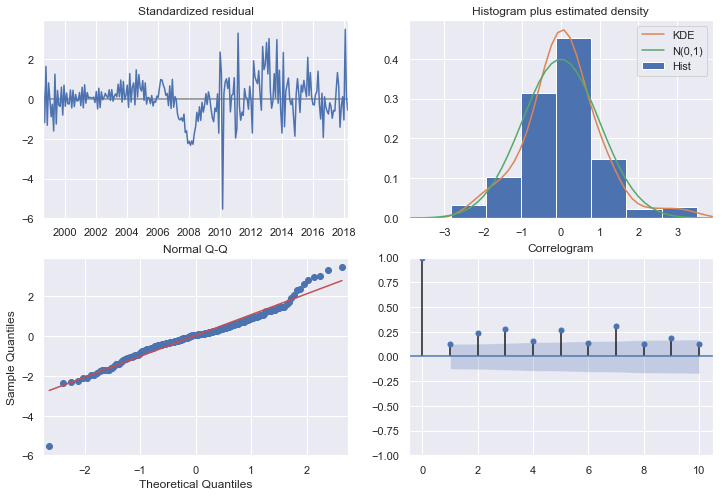

Next zipcode


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20019   No. Observations:                  265
Model:             SARIMAX(1, 0, 1)x(2, 0, 0, 12)   Log Likelihood               -2039.860
Date:                            Thu, 22 Aug 2019   AIC                           4089.721
Time:                                    12:52:45   BIC                           4107.124
Sample:                                04-01-1996   HQIC                          4096.733
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0048      0.003    307.548      0.000       0.998       1.011
ma.L1          0.9618      0.075     12.754      0.000       0.814       1.110
ar.S.L12       0.4979      0.206      2.420      0.016       0.095       0.901
ar.S.L24       0.0052      0.100      0.052      0.958      -0.190       0.201
sigma2      2.843e+06   1.23e-08   2.31e+14      0.000    2.84e+06    2.84e+06
===================================================================================
Ljung-Box (Q):                      496.78   Jarque-Bera (JB):                22.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.28   Skew:                            -0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.01e+29. Standard errors may be unstable.
"""

Diagnostics for zipcode 20019


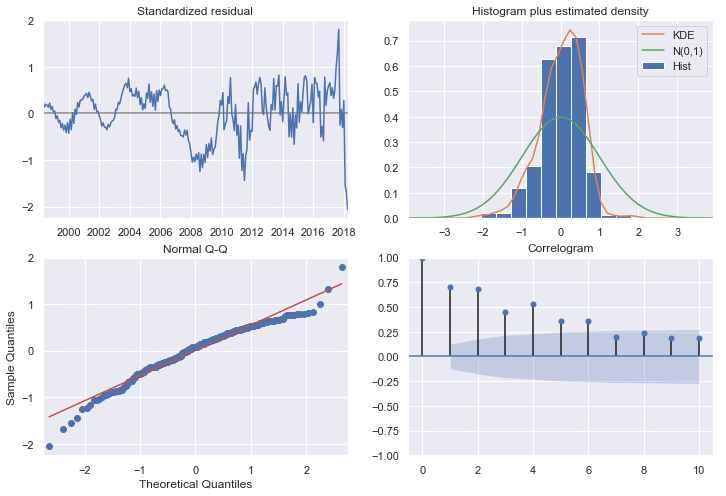

Next zipcode


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20032   No. Observations:                  265
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 12)   Log Likelihood               -2126.091
Date:                            Thu, 22 Aug 2019   AIC                           4264.182
Time:                                    12:52:49   BIC                           4285.066
Sample:                                04-01-1996   HQIC                          4272.597
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0046      0.003    379.508      0.000       0.999       1.010
ma.L1          0.9877      0.028     35.526      0.000       0.933       1.042
ar.S.L12      -0.0506      0.054     -0.943      0.346      -0.156       0.055
ar.S.L24      -0.0047      0.063     -0.074      0.941      -0.129       0.119
ma.S.L12       1.0831      0.035     30.869      0.000       1.014       1.152
sigma2      3.763e+06   2.29e-09   1.64e+15      0.000    3.76e+06    3.76e+06
===================================================================================
Ljung-Box (Q):                      471.52   Jarque-Bera (JB):                99.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              17.66   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.71e+30. Standard errors may be unstable.
"""

Diagnostics for zipcode 20032


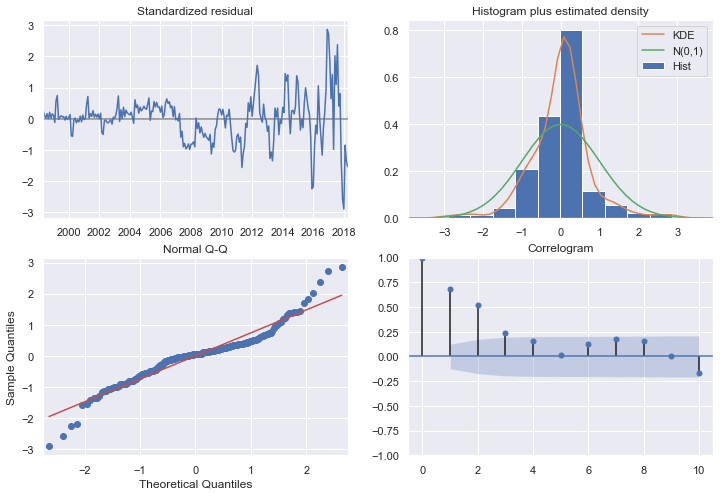

Next zipcode


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20015   No. Observations:                  265
Model:             SARIMAX(1, 0, 2)x(1, 0, 1, 12)   Log Likelihood               -2259.546
Date:                            Thu, 22 Aug 2019   AIC                           4531.093
Time:                                    12:52:53   BIC                           4552.221
Sample:                                04-01-1996   HQIC                          4539.596
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0028      0.003    330.797      0.000       0.997       1.009
ma.L1          1.6366      0.299      5.469      0.000       1.050       2.223
ma.L2          0.8975      0.289      3.104      0.002       0.331       1.464
ar.S.L12      -0.0006      0.072     -0.008      0.993      -0.141       0.140
ma.S.L12       0.3092      0.381      0.811      0.417      -0.438       1.056
sigma2      9.752e+06   6.49e-09    1.5e+15      0.000    9.75e+06    9.75e+06
===================================================================================
Ljung-Box (Q):                      633.95   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.00   Prob(JB):                         0.68
Heteroskedasticity (H):               1.75   Skew:                            -0.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.11e+32. Standard errors may be unstable.
"""

Diagnostics for zipcode 20015


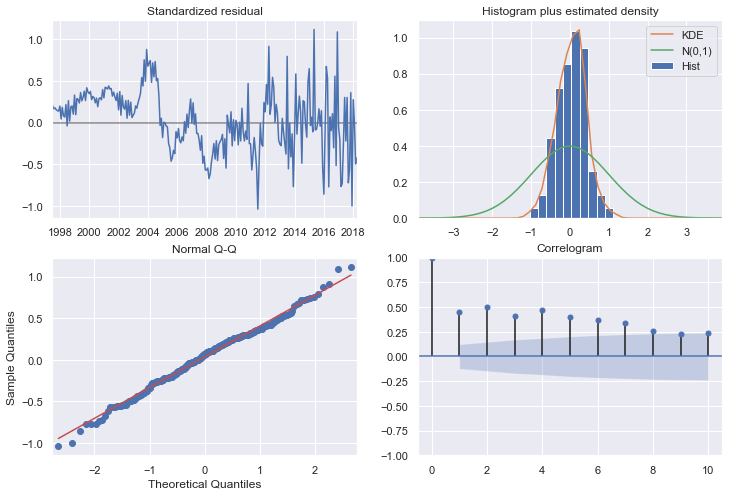

Next zipcode


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20012   No. Observations:                  265
Model:             SARIMAX(2, 0, 2)x(1, 0, 1, 12)   Log Likelihood               -2148.290
Date:                            Thu, 22 Aug 2019   AIC                           4310.580
Time:                                    12:52:56   BIC                           4335.230
Sample:                                04-01-1996   HQIC                          4320.501
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2678      0.072     17.696      0.000       1.127       1.408
ar.L2         -0.2642      0.072     -3.667      0.000      -0.405      -0.123
ma.L1          2.4566      0.102     23.974      0.000       2.256       2.657
ma.L2          1.6948      0.102     16.688      0.000       1.496       1.894
ar.S.L12       0.0152      0.307      0.050      0.960      -0.587       0.617
ma.S.L12       0.0294      0.307      0.096      0.924      -0.573       0.632
sigma2      8.299e+05   1.59e-07   5.21e+12      0.000     8.3e+05     8.3e+05
===================================================================================
Ljung-Box (Q):                      381.16   Jarque-Bera (JB):                 1.52
Prob(Q):                              0.00   Prob(JB):                         0.47
Heteroskedasticity (H):               3.90   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.56e+28. Standard errors may be unstable.
"""

Diagnostics for zipcode 20012


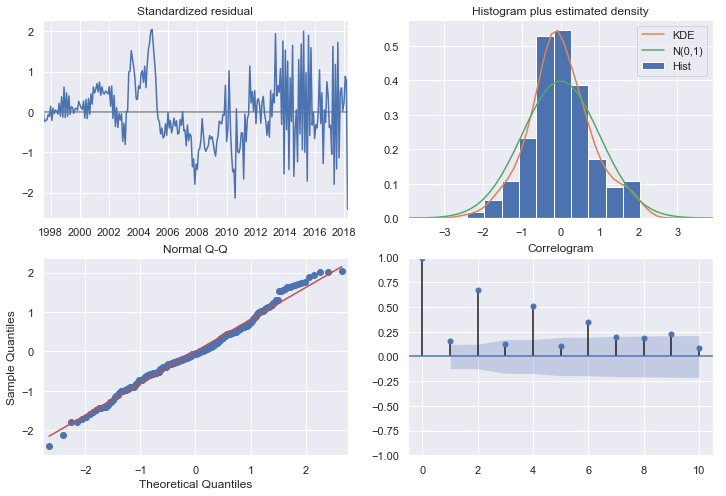

Next zipcode


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20018   No. Observations:                  265
Model:             SARIMAX(1, 0, 2)x(0, 0, 1, 12)   Log Likelihood               -2198.783
Date:                            Thu, 22 Aug 2019   AIC                           4407.567
Time:                                    12:53:00   BIC                           4425.174
Sample:                                04-01-1996   HQIC                          4414.653
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0051      0.004    232.684      0.000       0.997       1.014
ma.L1          1.6420      0.181      9.064      0.000       1.287       1.997
ma.L2          0.9327      0.188      4.968      0.000       0.565       1.301
ma.S.L12       0.2726      0.326      0.836      0.403      -0.366       0.912
sigma2      5.866e+06    4.9e-09    1.2e+15      0.000    5.87e+06    5.87e+06
===================================================================================
Ljung-Box (Q):                      408.97   Jarque-Bera (JB):                10.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.09   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.03e+31. Standard errors may be unstable.
"""

Diagnostics for zipcode 20018


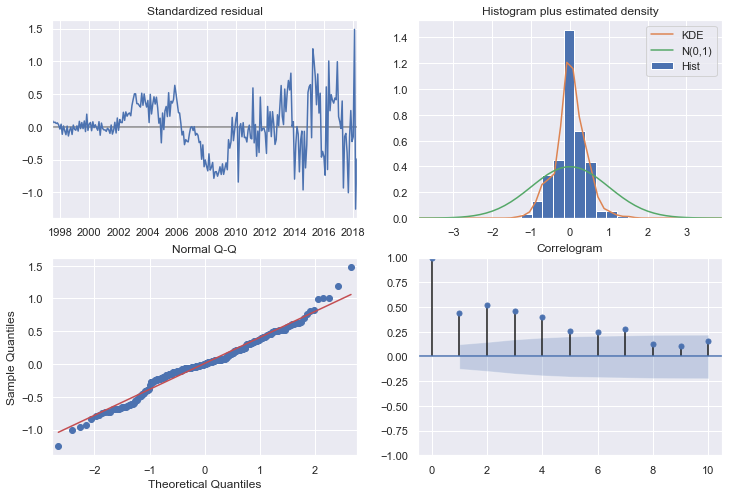

Next zipcode


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20017   No. Observations:                  265
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -2222.152
Date:                            Thu, 22 Aug 2019   AIC                           4454.305
Time:                                    12:53:02   BIC                           4471.932
Sample:                                04-01-1996   HQIC                          4461.398
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0051      0.002    526.109      0.000       1.001       1.009
ma.L1          0.9764      0.071     13.743      0.000       0.837       1.116
ar.S.L12       0.0035      0.315      0.011      0.991      -0.614       0.621
ma.S.L12       0.4349      0.321      1.356      0.175      -0.194       1.064
sigma2      5.512e+06   3.38e-08   1.63e+14      0.000    5.51e+06    5.51e+06
===================================================================================
Ljung-Box (Q):                      615.62   Jarque-Bera (JB):                67.02
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.31   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.22e+29. Standard errors may be unstable.
"""

Diagnostics for zipcode 20017


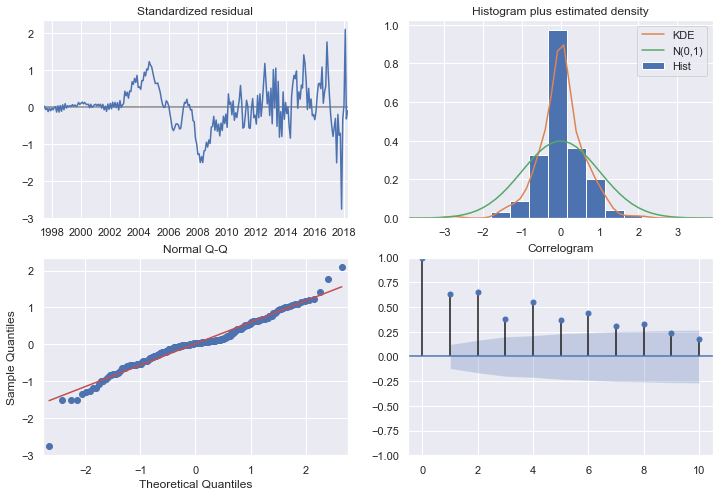

Next zipcode


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20002   No. Observations:                  265
Model:             SARIMAX(2, 0, 0)x(1, 1, 1, 12)   Log Likelihood               -2037.932
Date:                            Thu, 22 Aug 2019   AIC                           4085.864
Time:                                    12:53:06   BIC                           4103.246
Sample:                                04-01-1996   HQIC                          4092.869
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9080      0.033     58.231      0.000       1.844       1.972
ar.L2         -0.9097      0.033    -27.684      0.000      -0.974      -0.845
ar.S.L12      -0.5501      0.069     -7.916      0.000      -0.686      -0.414
ma.S.L12      -0.0365      0.045     -0.808      0.419      -0.125       0.052
sigma2      1.844e+06   6.44e-09   2.86e+14      0.000    1.84e+06    1.84e+06
===================================================================================
Ljung-Box (Q):                      236.29   Jarque-Bera (JB):                69.03
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              19.62   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.21e+29. Standard errors may be unstable.
"""

Diagnostics for zipcode 20002


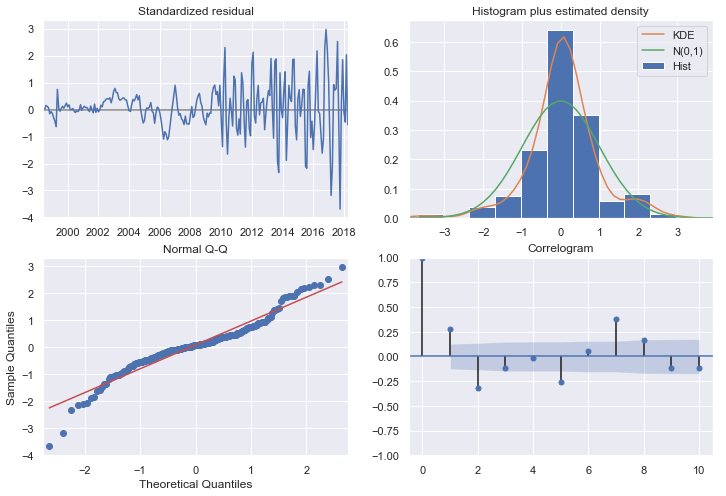

Next zipcode


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20009   No. Observations:                  265
Model:             SARIMAX(2, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -2007.336
Date:                            Thu, 22 Aug 2019   AIC                           4024.672
Time:                                    12:53:08   BIC                           4042.034
Sample:                                04-01-1996   HQIC                          4031.669
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4895      0.047     31.789      0.000       1.398       1.581
ar.L2         -0.5131      0.045    -11.408      0.000      -0.601      -0.425
ar.S.L12      -0.3541      0.054     -6.533      0.000      -0.460      -0.248
ar.S.L24      -0.2208      0.065     -3.418      0.001      -0.347      -0.094
sigma2      1.236e+06   7.52e+04     16.440      0.000    1.09e+06    1.38e+06
===================================================================================
Ljung-Box (Q):                       88.16   Jarque-Bera (JB):               211.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              13.77   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Diagnostics for zipcode 20009


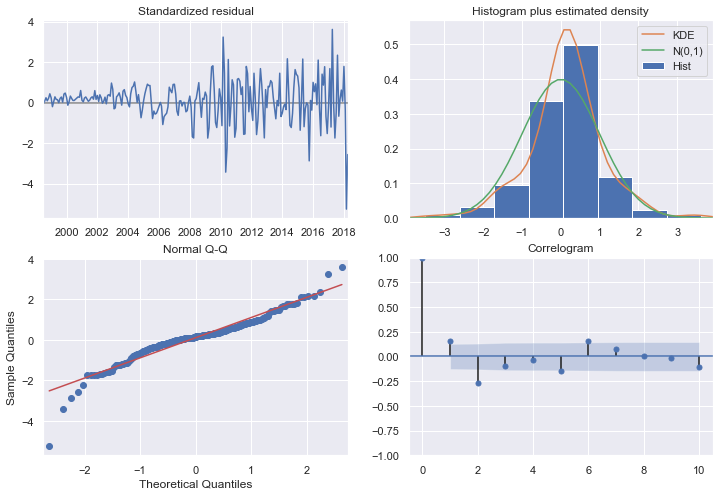

Next zipcode


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20016   No. Observations:                  265
Model:             SARIMAX(2, 0, 2)x(1, 0, 1, 12)   Log Likelihood               -2610.488
Date:                            Thu, 22 Aug 2019   AIC                           5234.976
Time:                                    12:53:11   BIC                           5259.627
Sample:                                04-01-1996   HQIC                          5244.897
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9935      0.088     11.228      0.000       0.820       1.167
ar.L2          0.0055      0.088      0.063      0.950      -0.167       0.178
ma.L1          1.8588      0.326      5.706      0.000       1.220       2.497
ma.L2          0.9978      0.329      3.029      0.002       0.352       1.644
ar.S.L12      -0.0005      0.021     -0.022      0.982      -0.041       0.040
ma.S.L12      11.4875      1.208      9.511      0.000       9.120      13.855
sigma2      1.442e+06   4.39e-06   3.29e+11      0.000    1.44e+06    1.44e+06
===================================================================================
Ljung-Box (Q):                      265.72   Jarque-Bera (JB):                27.28
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                            -0.02
Prob(H) (two-sided):                  0.16   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.77e+27. Standard errors may be unstable.
"""

Diagnostics for zipcode 20016


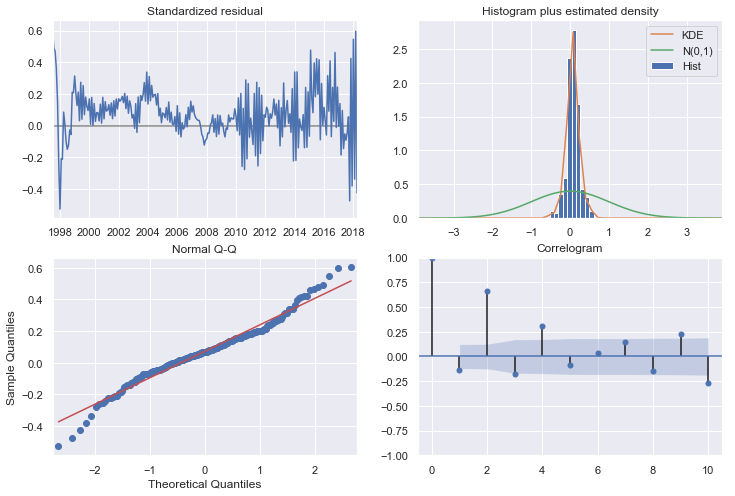

Next zipcode


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20037   No. Observations:                  265
Model:             SARIMAX(2, 1, 1)x(2, 0, 1, 12)   Log Likelihood               -2182.105
Date:                            Thu, 22 Aug 2019   AIC                           4378.211
Time:                                    12:53:14   BIC                           4402.517
Sample:                                04-01-1996   HQIC                          4388.007
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9823      0.072     13.629      0.000       0.841       1.124
ar.L2         -0.1420      0.076     -1.871      0.061      -0.291       0.007
ma.L1          0.6631      0.056     11.941      0.000       0.554       0.772
ar.S.L12       0.0569      0.102      0.560      0.576      -0.142       0.256
ar.S.L24       0.0023      0.029      0.079      0.937      -0.054       0.059
ma.S.L12      -0.4692      0.091     -5.172      0.000      -0.647      -0.291
sigma2      5.657e+06   3.35e+05     16.903      0.000       5e+06    6.31e+06
===================================================================================
Ljung-Box (Q):                      138.93   Jarque-Bera (JB):               774.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              11.40   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Diagnostics for zipcode 20037


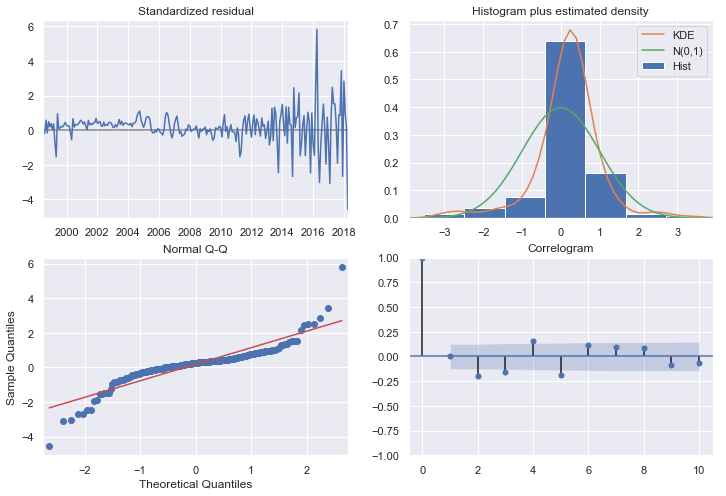

Next zipcode


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20007   No. Observations:                  265
Model:             SARIMAX(1, 1, 2)x(0, 0, 1, 12)   Log Likelihood               -2222.363
Date:                            Thu, 22 Aug 2019   AIC                           4454.726
Time:                                    12:53:16   BIC                           4472.313
Sample:                                04-01-1996   HQIC                          4461.805
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8588      0.045     19.169      0.000       0.771       0.947
ma.L1          1.3118      0.134      9.755      0.000       1.048       1.575
ma.L2          0.0852      0.118      0.720      0.471      -0.147       0.317
ma.S.L12      -0.0385      0.052     -0.743      0.457      -0.140       0.063
sigma2      2.842e+06   4.25e+05      6.681      0.000    2.01e+06    3.68e+06
===================================================================================
Ljung-Box (Q):                      194.04   Jarque-Bera (JB):               160.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              13.35   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Diagnostics for zipcode 20007


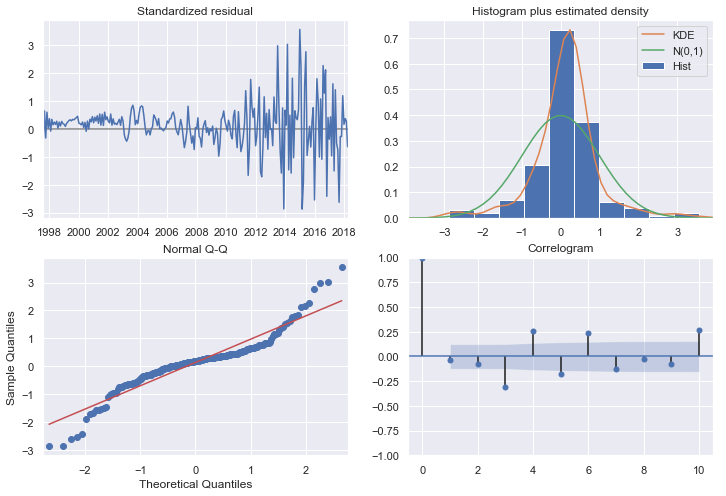

Next zipcode


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20024   No. Observations:                  265
Model:             SARIMAX(2, 1, 2)x(2, 0, 0, 12)   Log Likelihood               -2140.652
Date:                            Thu, 22 Aug 2019   AIC                           4295.303
Time:                                    12:53:19   BIC                           4319.609
Sample:                                04-01-1996   HQIC                          4305.099
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1847      0.053      3.477      0.001       0.081       0.289
ar.L2          0.5100      0.060      8.557      0.000       0.393       0.627
ma.L1          1.7451      0.018     99.117      0.000       1.711       1.780
ma.L2          1.0390      0.013     77.134      0.000       1.013       1.065
ar.S.L12      -0.2595      0.074     -3.485      0.000      -0.405      -0.114
ar.S.L24      -0.0068      0.047     -0.144      0.886      -0.100       0.086
sigma2      4.236e+06   9.36e-09   4.52e+14      0.000    4.24e+06    4.24e+06
===================================================================================
Ljung-Box (Q):                      112.47   Jarque-Bera (JB):              1310.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              14.24   Skew:                             1.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.87e+29. Standard errors may be unstable.
"""

Diagnostics for zipcode 20024


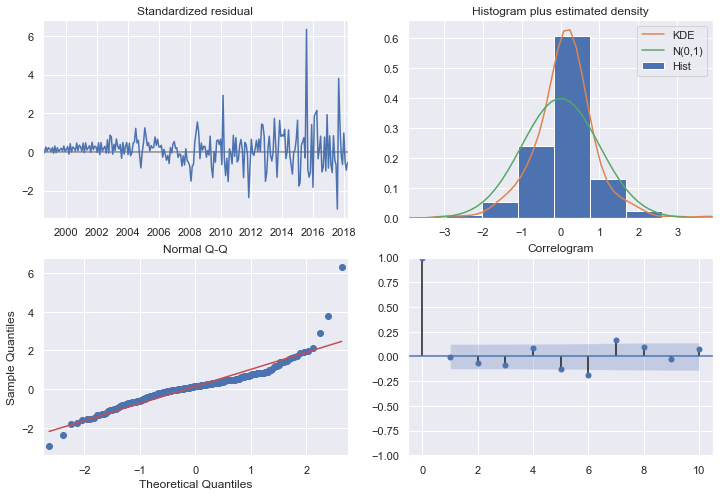

Next zipcode


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20011   No. Observations:                  265
Model:             SARIMAX(2, 1, 2)x(1, 0, 0, 12)   Log Likelihood               -2047.048
Date:                            Thu, 22 Aug 2019   AIC                           4106.095
Time:                                    12:53:21   BIC                           4127.224
Sample:                                04-01-1996   HQIC                          4114.599
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6279      0.097     16.795      0.000       1.438       1.818
ar.L2         -0.6328      0.094     -6.742      0.000      -0.817      -0.449
ma.L1          0.2928      0.085      3.428      0.001       0.125       0.460
ma.L2         -0.9911      0.101     -9.769      0.000      -1.190      -0.792
ar.S.L12      -0.0509      0.054     -0.950      0.342      -0.156       0.054
sigma2      7.111e+05    6.4e+04     11.114      0.000    5.86e+05    8.36e+05
===================================================================================
Ljung-Box (Q):                      107.86   Jarque-Bera (JB):               660.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              23.77   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Diagnostics for zipcode 20011


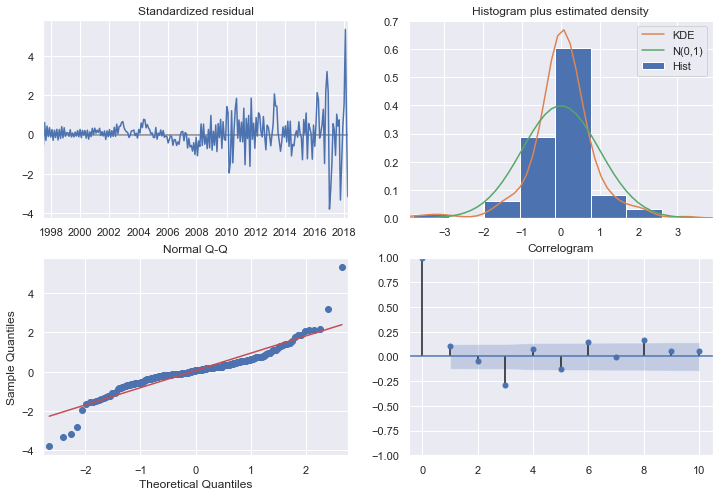

Next zipcode


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20010   No. Observations:                  265
Model:             SARIMAX(2, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -2048.152
Date:                            Thu, 22 Aug 2019   AIC                           4106.303
Time:                                    12:53:23   BIC                           4123.911
Sample:                                04-01-1996   HQIC                          4113.390
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2259      0.072     17.144      0.000       1.086       1.366
ar.L2         -0.2602      0.070     -3.739      0.000      -0.397      -0.124
ma.L1          0.6320      0.047     13.440      0.000       0.540       0.724
ma.S.L12      -0.4523      0.054     -8.443      0.000      -0.557      -0.347
sigma2      8.414e+05   5.71e+04     14.737      0.000     7.3e+05    9.53e+05
===================================================================================
Ljung-Box (Q):                       64.38   Jarque-Bera (JB):                89.06
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):              10.19   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Diagnostics for zipcode 20010


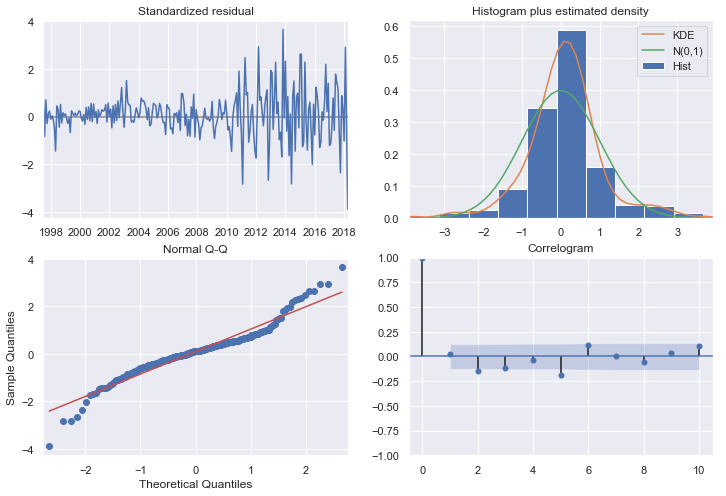

Next zipcode


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20001   No. Observations:                  265
Model:             SARIMAX(2, 0, 1)x(1, 1, 0, 12)   Log Likelihood               -2084.019
Date:                            Thu, 22 Aug 2019   AIC                           4178.039
Time:                                    12:53:25   BIC                           4195.421
Sample:                                04-01-1996   HQIC                          4185.043
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7976      0.045     39.685      0.000       1.709       1.886
ar.L2         -0.8036      0.045    -17.835      0.000      -0.892      -0.715
ma.L1          0.7313      0.052     14.058      0.000       0.629       0.833
ar.S.L12      -0.0581      0.025     -2.296      0.022      -0.108      -0.009
sigma2       2.68e+06    3.3e-09   8.13e+14      0.000    2.68e+06    2.68e+06
===================================================================================
Ljung-Box (Q):                      144.32   Jarque-Bera (JB):                94.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              11.55   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.41e+30. Standard errors may be unstable.
"""

Diagnostics for zipcode 20001


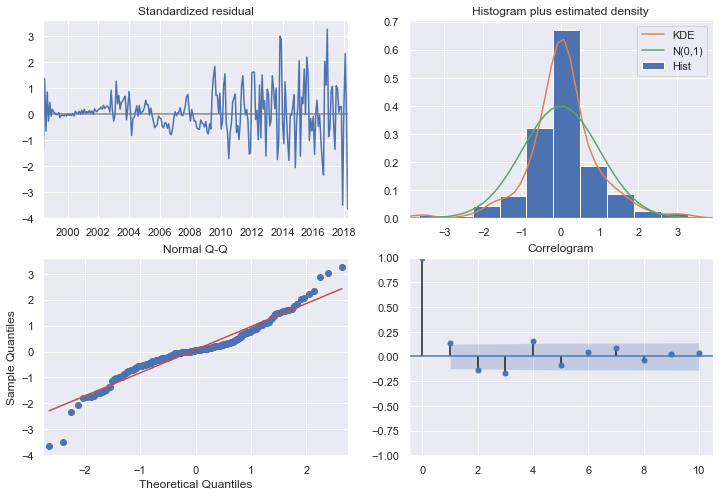

Next zipcode


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20008   No. Observations:                  265
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -2468.505
Date:                            Thu, 22 Aug 2019   AIC                           4943.010
Time:                                    12:53:27   BIC                           4953.574
Sample:                                04-01-1996   HQIC                          4947.262
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8991      0.030     30.448      0.000       0.841       0.957
ma.S.L12       0.2034      0.067      3.040      0.002       0.072       0.334
sigma2      2.207e+07   2.31e-10   9.55e+16      0.000    2.21e+07    2.21e+07
===================================================================================
Ljung-Box (Q):                      322.53   Jarque-Bera (JB):                 2.30
Prob(Q):                              0.00   Prob(JB):                         0.32
Heteroskedasticity (H):               1.83   Skew:                            -0.19
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.72e+32. Standard errors may be unstable.
"""

Diagnostics for zipcode 20008


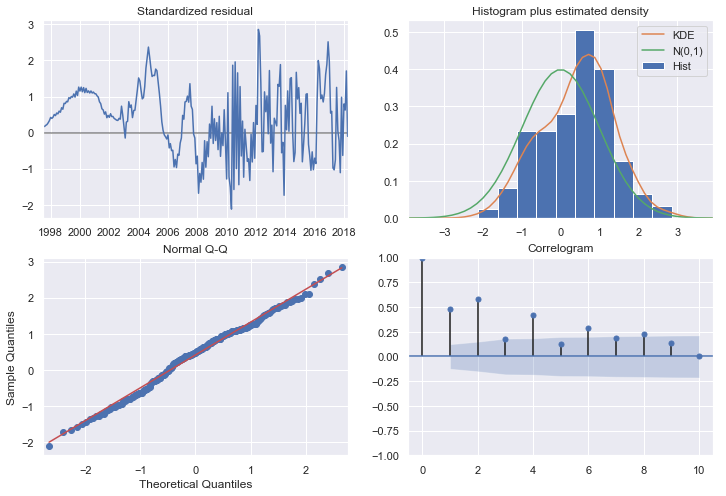

Next zipcode


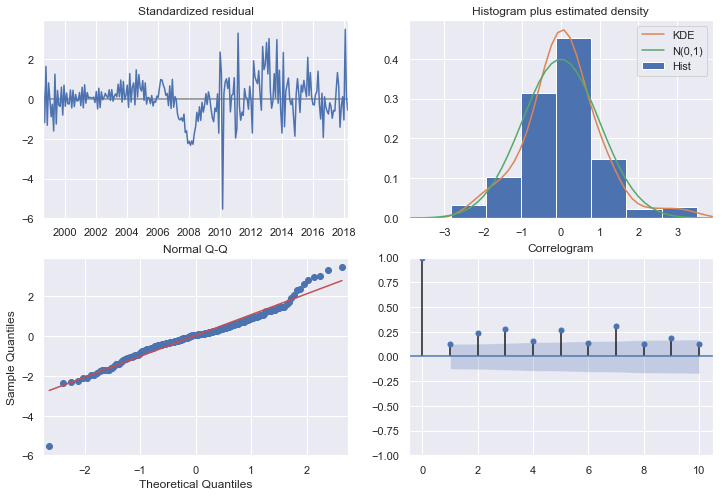

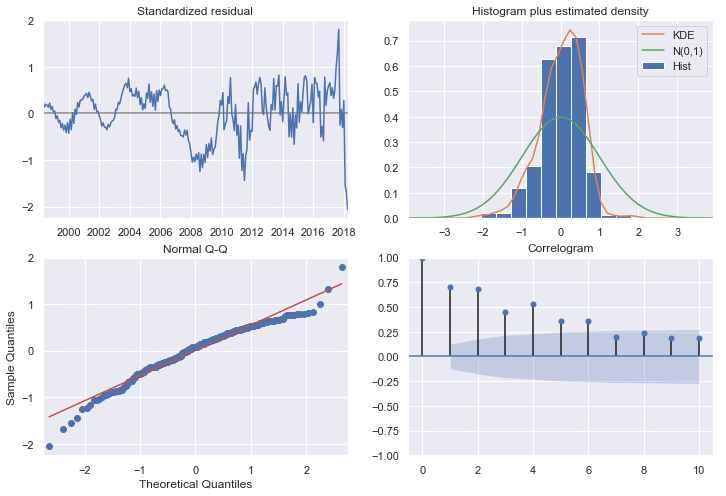

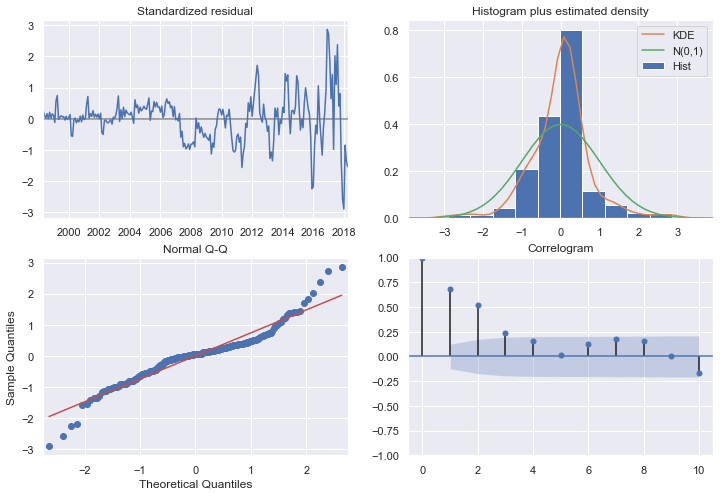

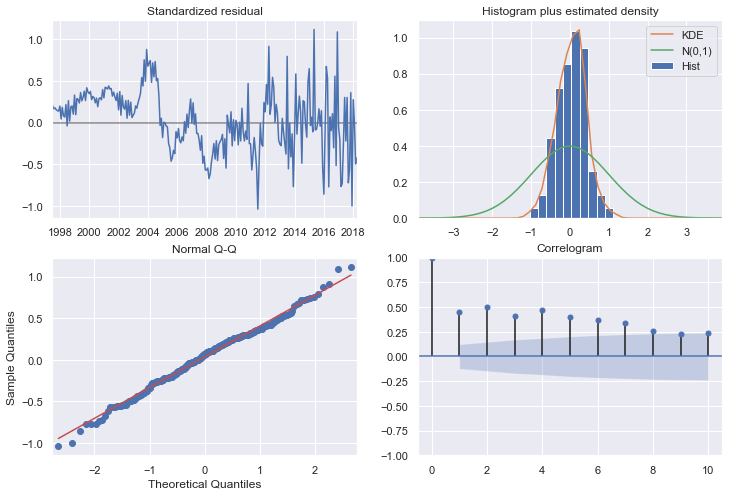

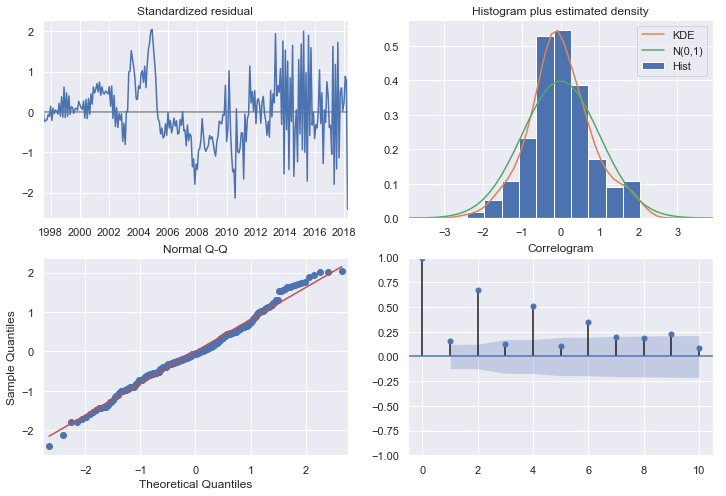

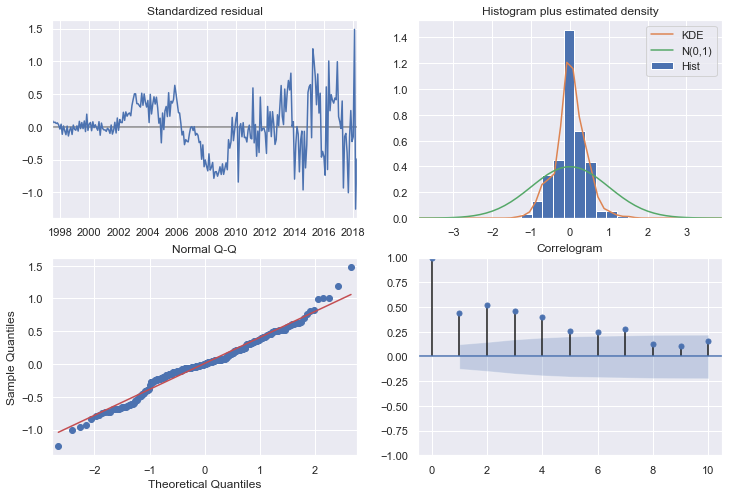

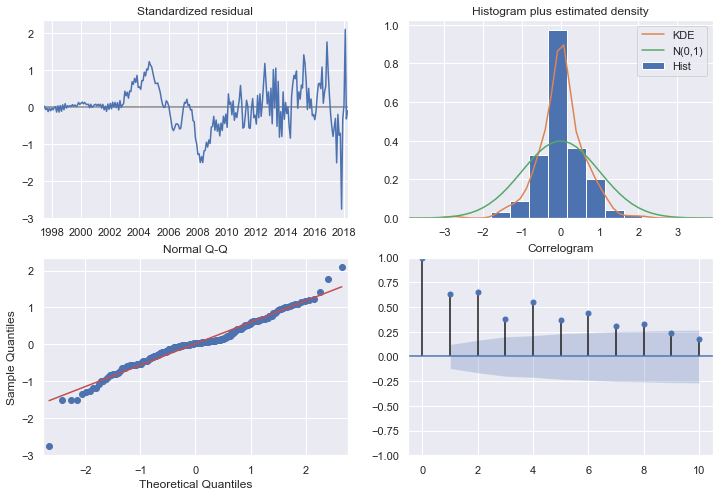

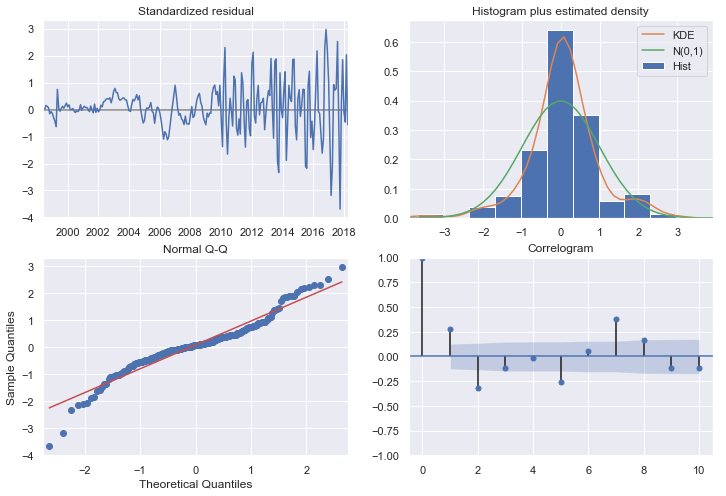

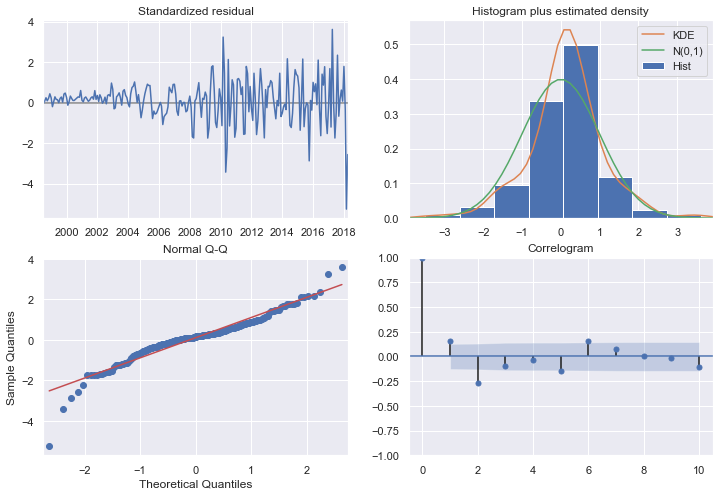

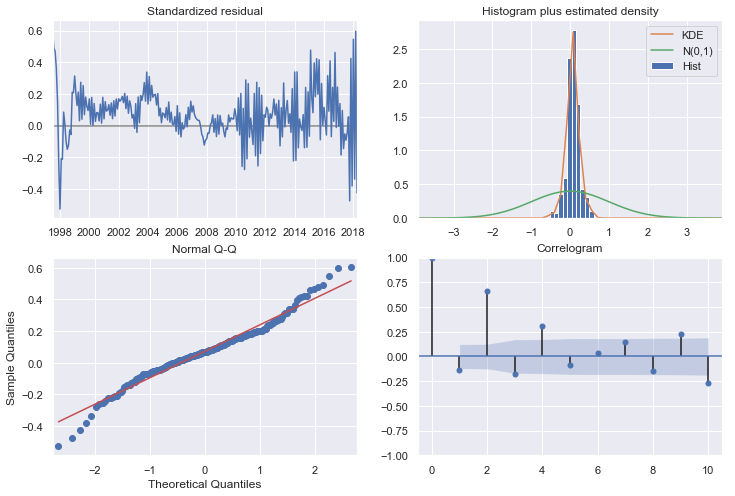

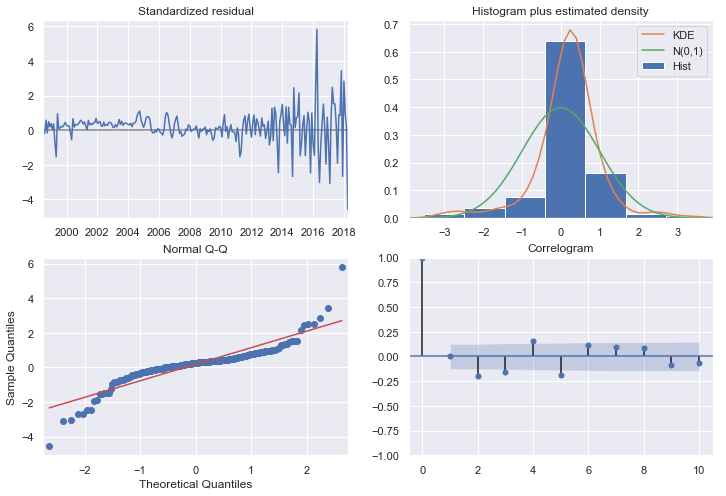

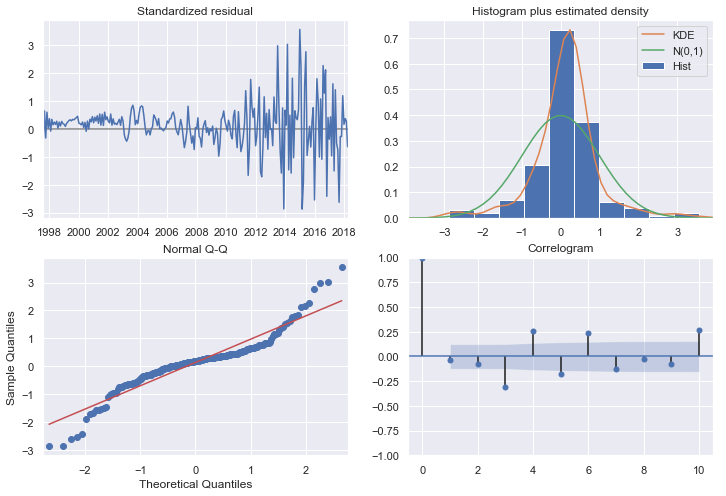

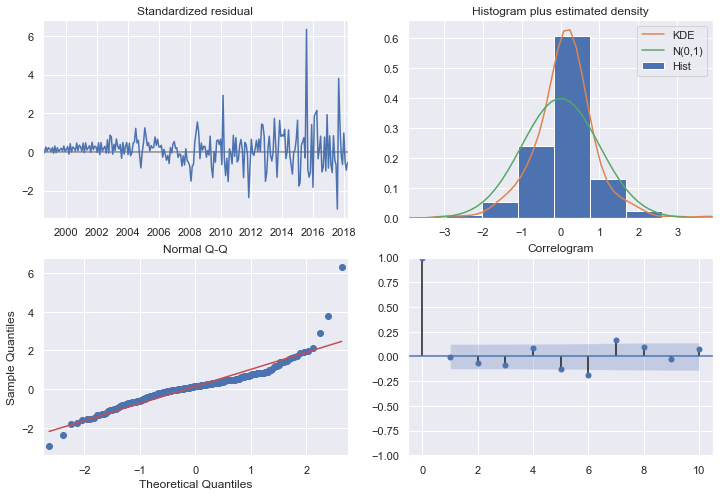

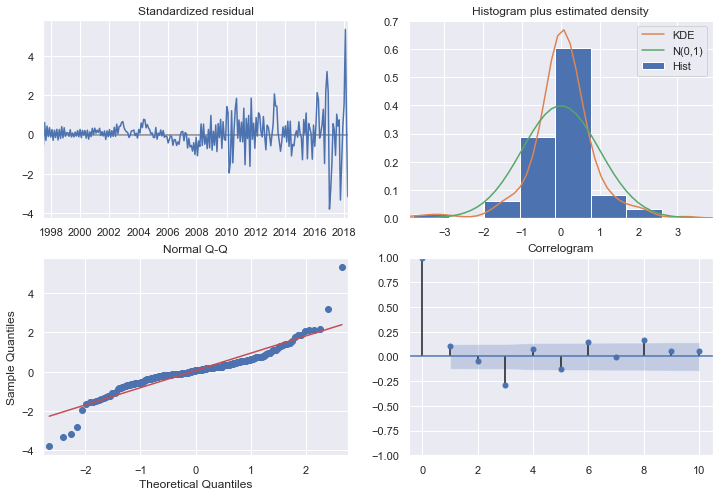

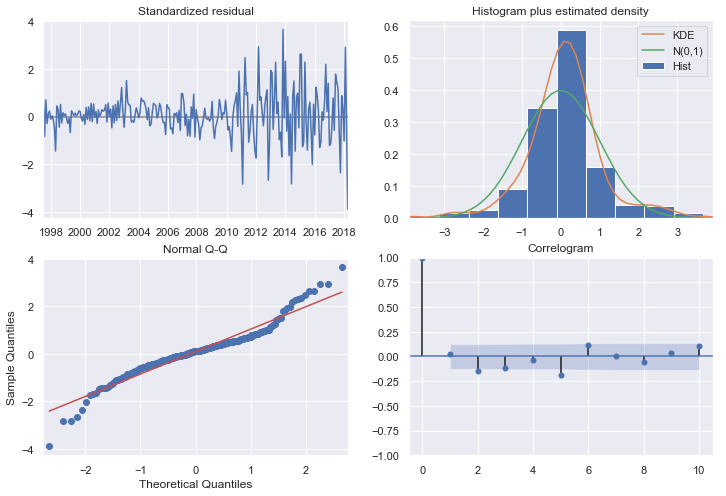

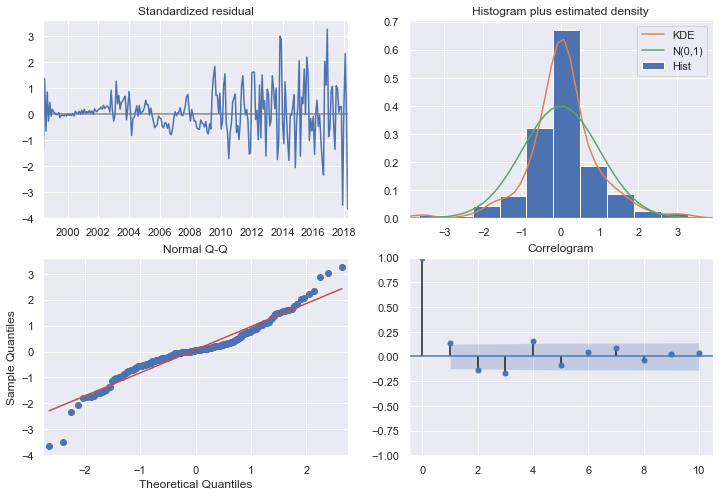

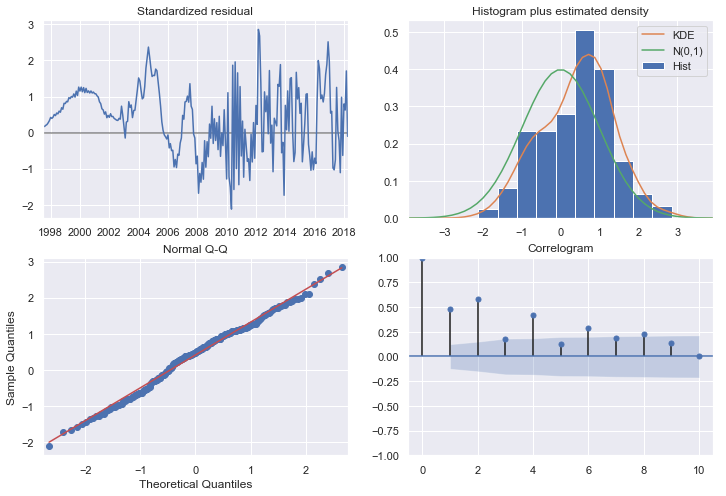

In [12]:
for zipcode in best_results_cvrmse.zipcode:
    order,sorder,trend = extract_params(best_results_cvrmse, zipcode)
    output = sarimax(ts_all[zipcode], order, sorder)
    display(output.summary())
    print(f'Diagnostics for zipcode {zipcode}')
    display(output.plot_diagnostics(figsize=(12,8)))
    print('Next zipcode')

Train Test Split Complete 
Length of Train: 253 	Length of Test: 12


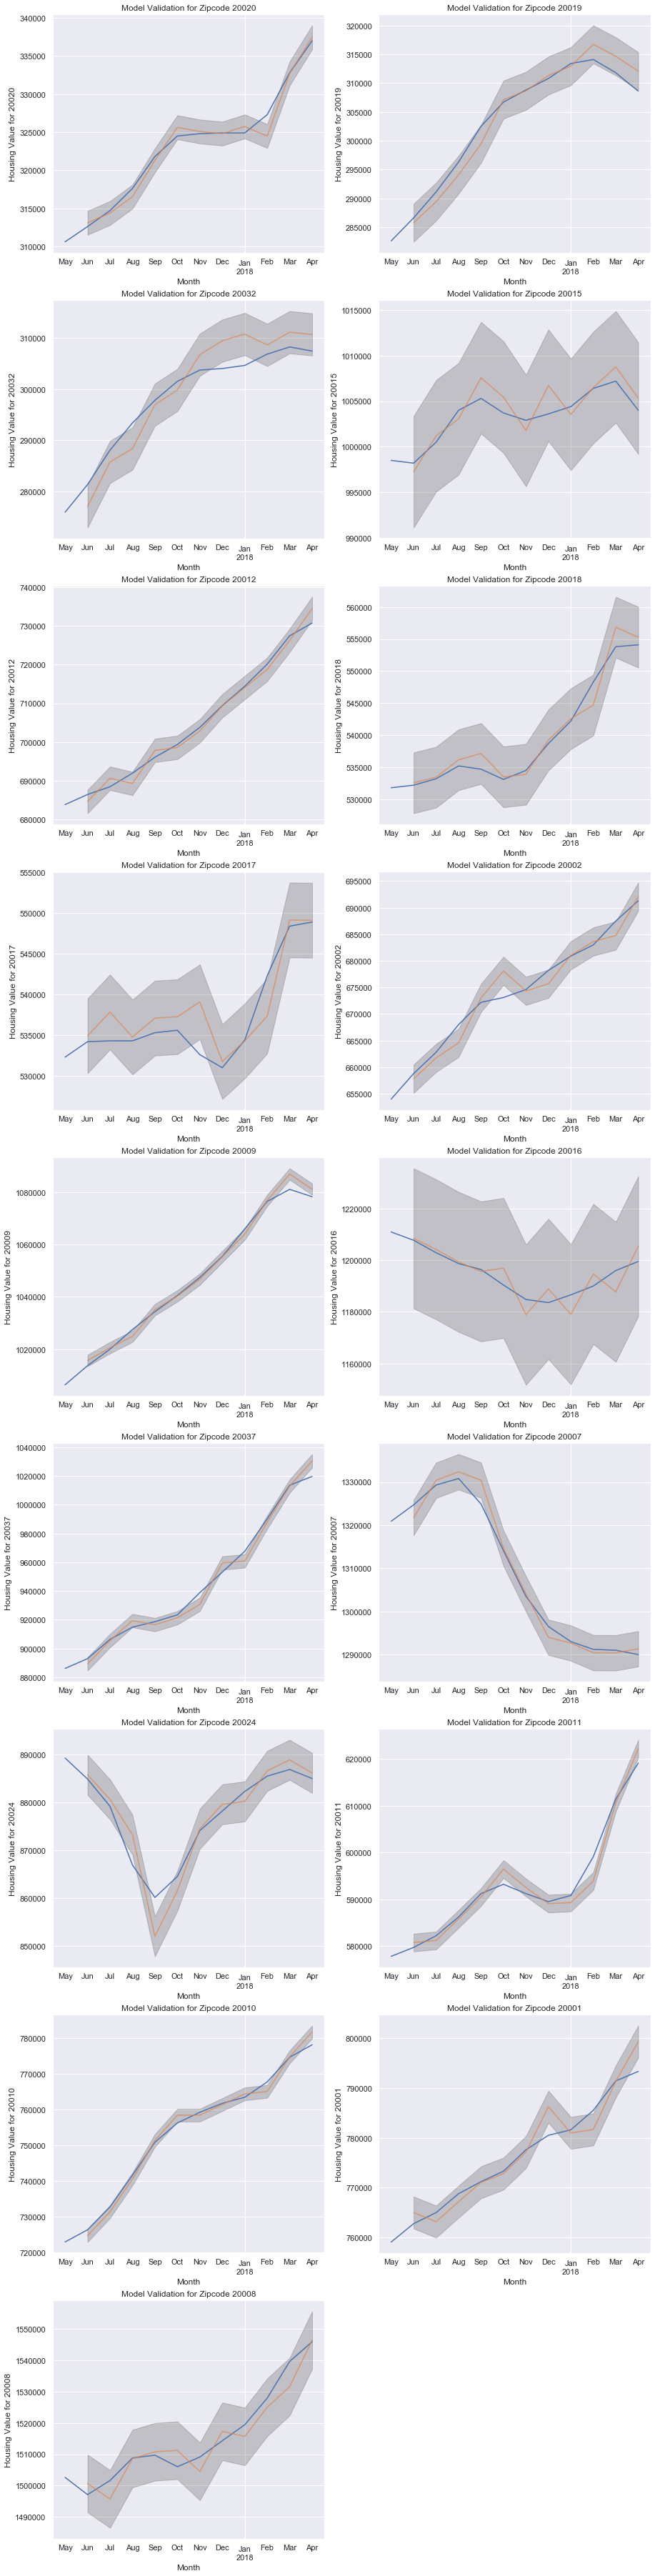

In [13]:
plot_predictions(best_results_cvrmse, ts_all)

**Observations:**

The diagnostic plots are close but not ideal. The parameters could be adjusted further. The prediction plots look good though so I will continue the analysis with the current models.

## Visualize forecasts

Use the function `plot_predictions()` to visualize the model forecast for the next 2 years. 

Train Test Split Complete 
Length of Train: 253 	Length of Test: 12


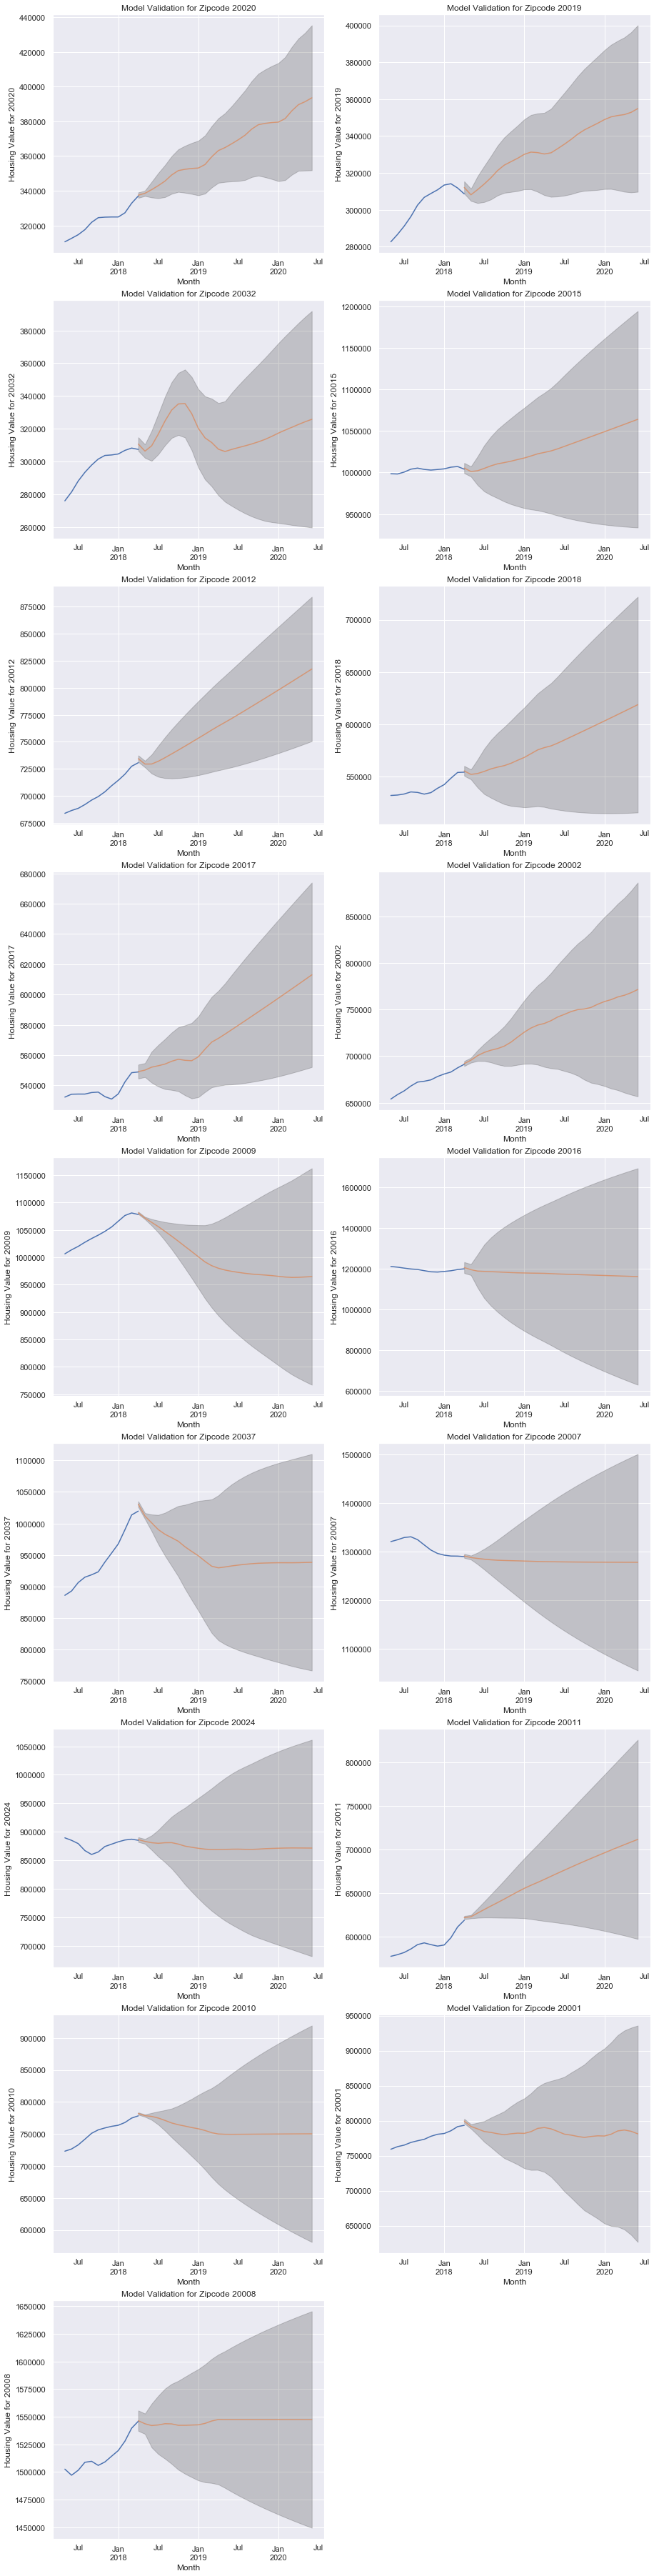

In [14]:
plot_predictions(best_results_cvrmse, ts_all, start_test='2017-01', start_pred='2018-04', end_pred='2020-06')

## Calculate historical ROI for 1 year and 2 years

Compare the 1 year and 2 year return on investment for each zipcode using the function `plot_roi()`. Create and save dataframe of zipcodes and ROIs.

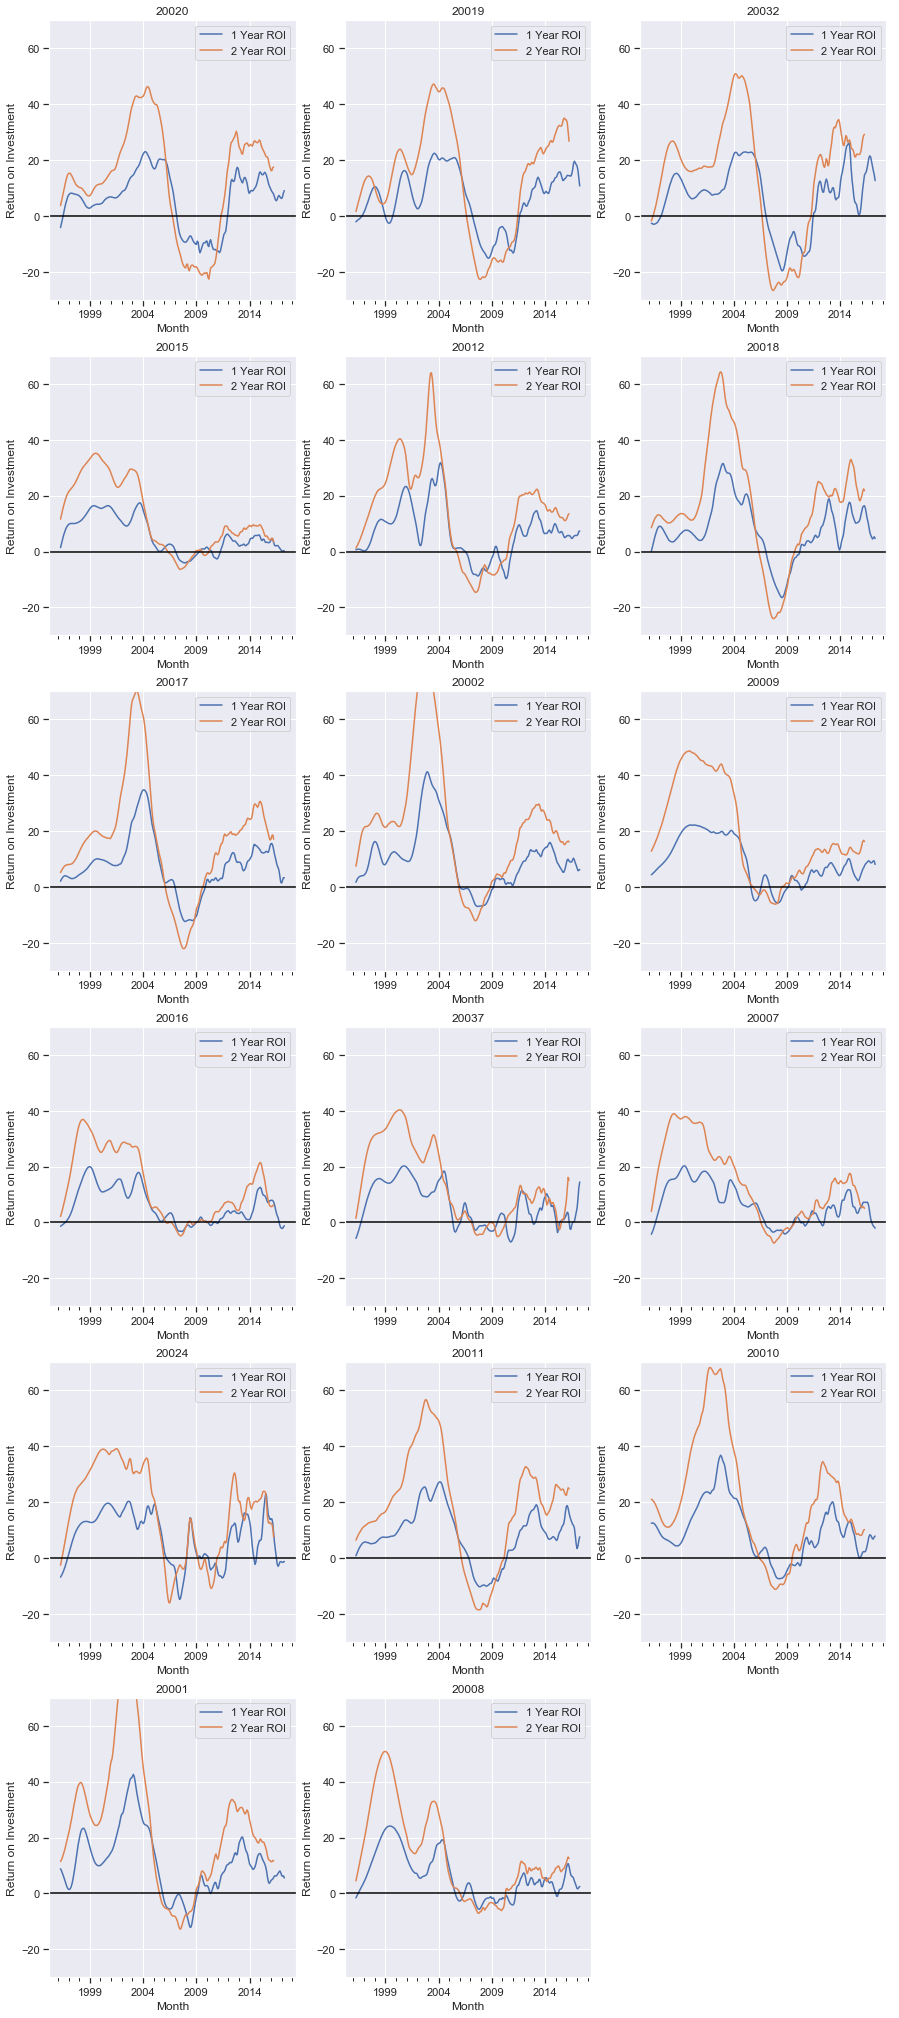

In [15]:
plot_roi(best_results_cvrmse, ts_all)

ROI = pd.DataFrame(roi, columns=['Zipcode', 'ROI_1yr', 'ROI_2yr'])
ROI

ROI.to_csv('best_zipcodes_roi.csv', index=False)

In [16]:
best_zipcodes_roi = pd.read_csv('best_zipcodes_roi.csv')
best_zipcodes_roi

Zipcode  ROI_1yr  ROI_2yr
0     20020    0.067    0.145
1     20019    0.073    0.138
2     20032    0.014    0.044
3     20015    0.018    0.051
4     20012    0.041    0.103
5     20018    0.038    0.100
6     20017    0.036    0.100
7     20002    0.061    0.104
8     20009   -0.087   -0.107
9     20016   -0.018   -0.029
10    20037   -0.086   -0.080
11    20007   -0.008   -0.009
12    20024   -0.018   -0.015
13    20011    0.070    0.135
14    20010   -0.034   -0.036
15    20001   -0.006   -0.010
16    20008    0.000    0.001

## Select best 5 zipcodes

Sort ROI values by both 1 year and 2 year ROI. Compare to forecast graphs. Use visualization with knowledge of the region to identify the 5 best zipcodes for investment.

In [17]:
best_zipcodes_roi.sort_values(axis=0, by='ROI_1yr', ascending=False)[:5]

Zipcode  ROI_1yr  ROI_2yr
1     20019    0.073    0.138
13    20011    0.070    0.135
0     20020    0.067    0.145
7     20002    0.061    0.104
4     20012    0.041    0.103

In [18]:
best_zipcodes_roi.sort_values(axis=0, by='ROI_2yr', ascending=False)[:5]

Zipcode  ROI_1yr  ROI_2yr
0     20020    0.067    0.145
1     20019    0.073    0.138
13    20011    0.070    0.135
7     20002    0.061    0.104
4     20012    0.041    0.103

### Based on ROI, future forecasting, and personal knowledge of the area, I think the best zip codes to invest in are:
* 20020
* 20019
* 20002
* 20011
* 20012

## Visualize best zipcodes

Use the function `plot_predictions()` to graph the forecasts for the top 5 zipcodes.

In [19]:
best_zipcodes = [20020,20019,20002,20011,20012]

In [20]:
best_results = best_results_cvrmse.loc[best_results_cvrmse['zipcode'].isin(best_zipcodes)]

Train Test Split Complete 
Length of Train: 253 	Length of Test: 12


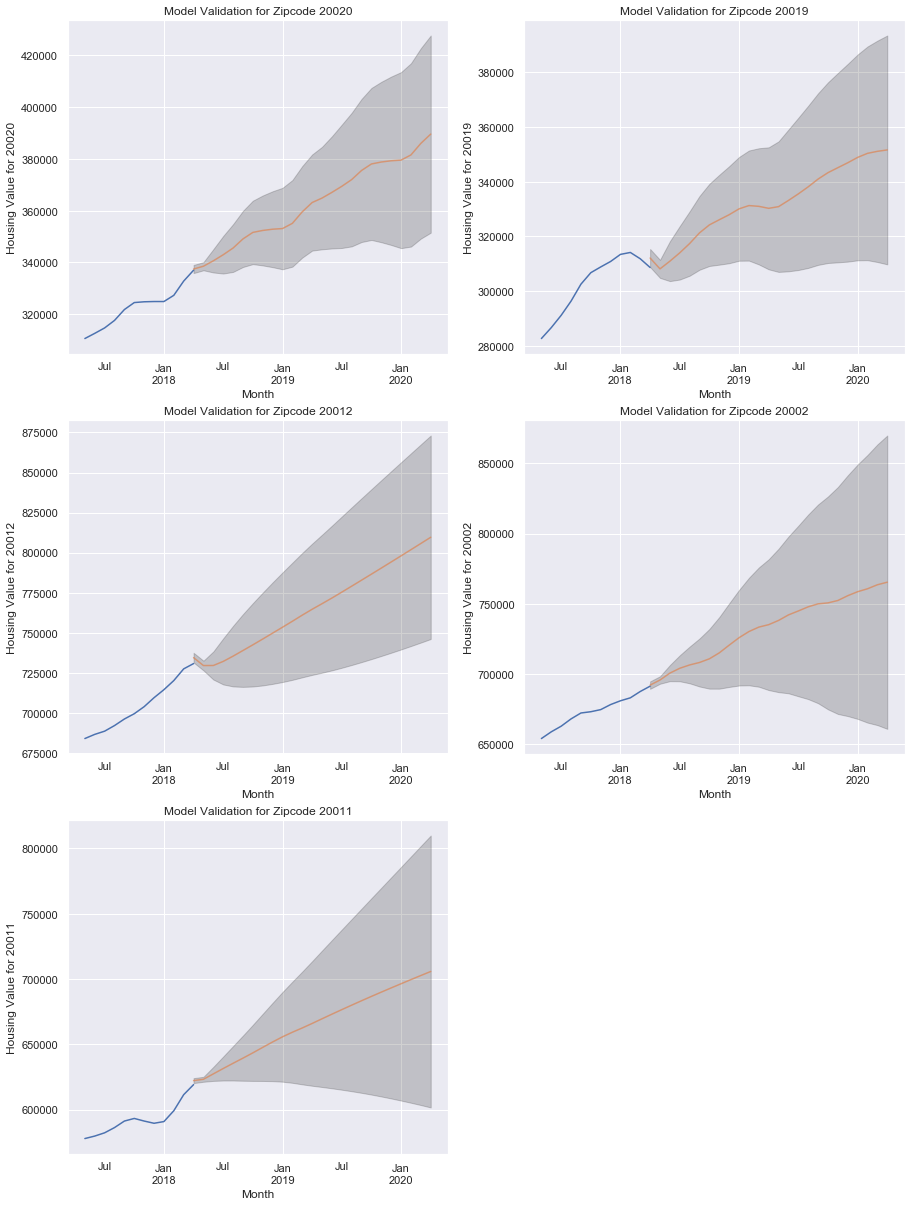

In [21]:
plot_predictions(best_results, ts_all, start_pred='2018-04', end_pred='2020-04', dynamic=False)

Train Test Split Complete 
Length of Train: 253 	Length of Test: 12


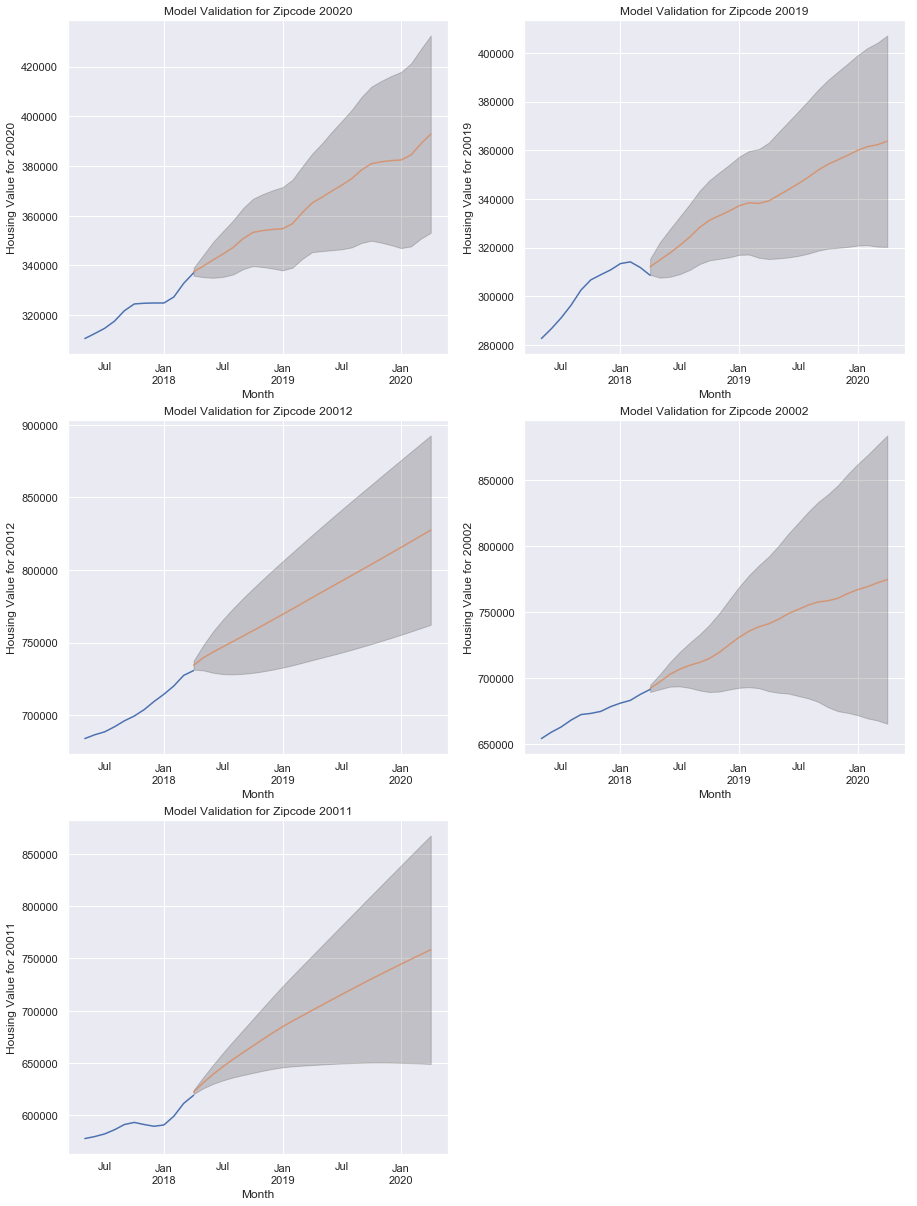

In [22]:
plot_predictions(best_results, ts_all, start_pred='2018-04', end_pred='2020-04', dynamic=True)

## Future Work

* Continue to optimize parameters using ACF and PACF plots to get more reliable predictions. 
* Test functions on other regions.
* Consider other metrics for determining the best zipcodes to invest in.
* Check for inflation adjustments in given dataset. 

In [23]:
#Finish generalizing this function

def get_roi_predictions(best_results_cvrmse, ts_all):
    roi=[]
    for zipcode in best_results_cvrmse.zipcode:
        order,sorder,trend = extract_params(best_results_cvrmse, zipcode)
        output = sarimax(ts_all[zipcode], order, sorder)
        pred = output.get_prediction(start=start_pred, end=end_pred, dynamic=dynamic)

## Resources

https://www.mikulskibartosz.name/nested-cross-validation-in-time-series-forecasting-using-scikit-learn-and-statsmodels/

https://medium.com/@abhikjha/predicting-sensex-48f4afb900b5

https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/

https://hub.packtpub.com/cross-validation-strategies-for-time-series-forecasting-tutorial/

www.zeemaps.com/